In [3]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from tqdm.notebook import tqdm
import os
import seaborn as sns
sns.set(style="whitegrid", font="FreeSans")

In [5]:
task_data = pd.read_csv("../gambling_clean_data.csv")
model_assignment = pd.read_csv("../LL_model2.csv")
palette = {'Declarative' : 'tomato', 'Procedural' : 'steelblue'}

In [7]:
task_data

,Unnamed: 0,HCPID,Trial,RunNumber,TrialType,RunTrialNumber,Block,CurrentResponse,QuestionMark.ACC,RT,...,ConsecSameResp,ConsecLargerGuesses,ConsecSmallerGuesses,ConsecRTLess200,FutureResponse,PastResponse,ResponseSwitch,PreviousFeedback,BlockType,BlockTypeCoded
0,1,100307_fnca,1,1,Reward,2,5,2.0,0,380,...,1,0,1,0,3.0,NaN,1.0,NaN,MostlyReward,MostlyReward
1,2,100307_fnca,2,1,Reward,3,5,3.0,0,336,...,1,1,0,0,3.0,2.0,0.0,Reward,MostlyReward,MostlyReward
2,3,100307_fnca,3,1,Punishment,4,5,3.0,0,260,...,2,2,0,0,3.0,3.0,0.0,Reward,MostlyReward,MostlyReward
3,4,100307_fnca,4,1,Reward,5,5,3.0,0,231,...,3,3,0,0,2.0,3.0,1.0,Punishment,MostlyReward,MostlyReward
4,5,100307_fnca,5,1,Reward,6,5,2.0,0,292,...,1,0,1,0,3.0,3.0,1.0,Reward,MostlyReward,MostlyReward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12667,12668,994273_fnca,31,2,Reward,29,5,3.0,0,321,...,1,1,0,0,3.0,2.0,0.0,Punishment,MostlyReward,MostlyReward
12668,12669,994273_fnca,32,2,Punishment,30,5,3.0,0,614,...,2,2,0,0,3.0,3.0,0.0,Reward,MostlyReward,MostlyReward
12669,12670,994273_fnca,33,2,Reward,31,5,3.0,0,669,...,3,3,0,0,2.0,3.0,1.0,Punishment,MostlyReward,MostlyReward
12670,12671,994273_fnca,34,2,Reward,32,5,2.0,0,1080,...,1,0,1,0,2.0,3.0,0.0,Reward,MostlyReward,MostlyReward


In [13]:
alldata = pd.merge(task_data, model_assignment, on=["HCPID"])

,index,HCPID,TrialType,best.model,ResponseSwitch
0,0,100307_fnca,Neutral,Procedural,0.500000
1,1,100307_fnca,Punishment,Procedural,0.400000
2,2,100307_fnca,Reward,Procedural,0.640000
3,3,100408_fnca,Neutral,Procedural,0.500000
4,4,100408_fnca,Punishment,Procedural,0.565217
...,...,...,...,...,...
592,592,992774_fnca,Punishment,Procedural,0.320000
593,593,992774_fnca,Reward,Procedural,0.560000
594,594,994273_fnca,Neutral,Procedural,0.500000
595,595,994273_fnca,Punishment,Procedural,0.363636


# By Trial

In [15]:
bytrial = alldata.groupby(["HCPID", "TrialType", "best.model"], as_index=False).aggregate({'ResponseSwitch' : 'mean'})
bytrial=bytrial.reset_index()
bytrial.value_counts('best.model')

best.model
Procedural     498
Declarative     99
Name: count, dtype: int64

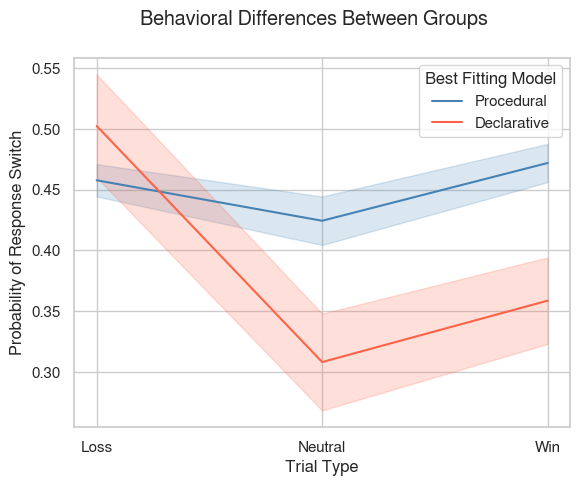

In [16]:
bytrial = bytrial.replace({"TrialType" : {"Reward" : "Win", "Punishment" : "Loss"}})
bytrial = bytrial.sort_values("TrialType")
ax = sns.lineplot(data=bytrial, x="TrialType", y="ResponseSwitch", hue="best.model", errorbar='se', sort=False, palette=palette)
ax.set(xlabel = "Trial Type", ylabel = "Probability of Response Switch")
plt.legend(loc='upper right', title="Best Fitting Model")
plt.suptitle("Behavioral Differences Between Groups")
plt.show()

# By Block

In [18]:
byblock = alldata.groupby(["HCPID", "BlockTypeCoded", "best.model"], as_index=False).aggregate({'ConsecSameResp' : 'max',
                                                                                               'ResponseSwitch' : 'mean'})
byblock = byblock.reset_index()
byblock = byblock.replace({"BlockTypeCoded" : {"MostlyReward" : "Mostly Wins", "MostlyPunishment" : "Mostly Losses"}})
byblock = byblock.sort_values("BlockTypeCoded")
byblock

,index,HCPID,BlockTypeCoded,best.model,ConsecSameResp,ResponseSwitch
0,0,100307_fnca,Mostly Losses,Procedural,4,0.500000
204,204,143325_fnca,Mostly Losses,Procedural,4,0.440000
206,206,144226_fnca,Mostly Losses,Declarative,3,0.714286
208,208,144832_fnca,Mostly Losses,Procedural,6,0.321429
210,210,145531_fnca,Mostly Losses,Procedural,3,0.555556
...,...,...,...,...,...,...
239,239,150523_fnca,Mostly Wins,Procedural,5,0.428571
241,241,150524_fnca,Mostly Wins,Procedural,8,0.346154
77,77,114419_fnca,Mostly Wins,Procedural,3,0.464286
207,207,144226_fnca,Mostly Wins,Declarative,4,0.428571


## Persistance

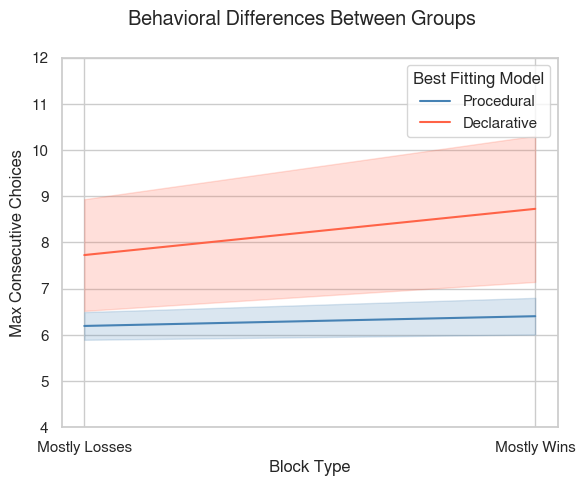

In [20]:
ax = sns.lineplot(data=byblock, x="BlockTypeCoded", y="ConsecSameResp", hue="best.model", errorbar='se', sort=False, palette=palette)
ax.set(xlabel = "Block Type", ylabel = "Max Consecutive Choices", ylim=(4, 12))
plt.legend(loc='upper right', title="Best Fitting Model")
plt.suptitle("Behavioral Differences Between Groups")
plt.show()

## Response SWitch

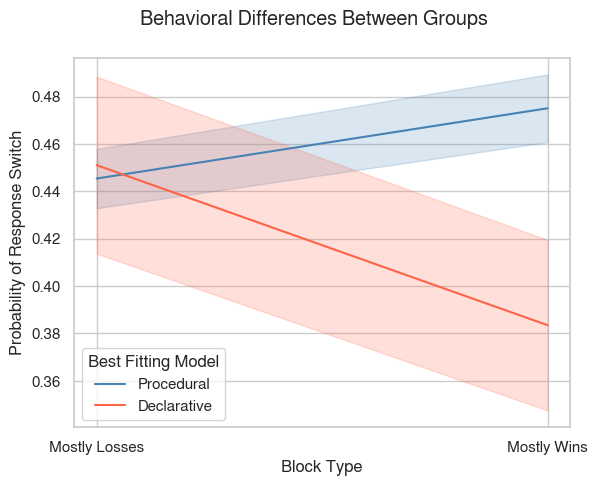

In [24]:
ax = sns.lineplot(data=byblock, x="BlockTypeCoded", y="ResponseSwitch", hue="best.model", errorbar='se', sort=False, palette=palette)
ax.set(xlabel = "Block Type", ylabel = "Probability of Response Switch")
plt.legend(loc='lower left', title="Best Fitting Model")
plt.suptitle("Behavioral Differences Between Groups")
plt.show()

# Article Figures


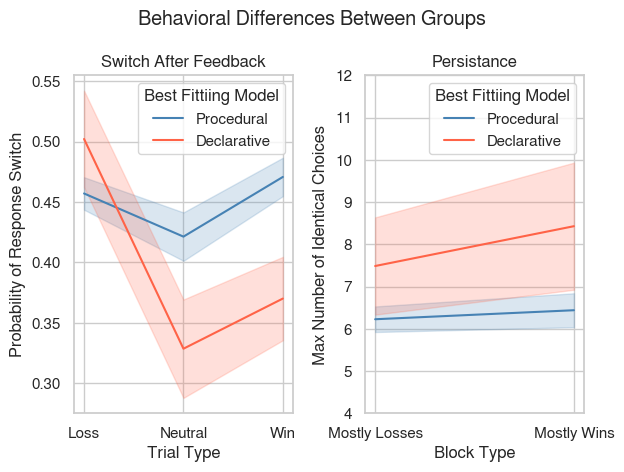

In [18]:
fig, axs = plt.subplots(1, 2)
ax = sns.lineplot(data=bytrial, x="TrialType", y="ResponseSwitch", hue="best.model", errorbar='se', sort=False, ax=axs[0], palette=palette)
ax.set(xlabel = "Trial Type", ylabel = "Probability of Response Switch", title="Switch After Feedback")
ax.legend(loc='upper right', title="Best Fittiing Model")

ax = sns.lineplot(data=byblock, x="BlockTypeCoded", y="ConsecSameResp", hue="best.model", errorbar='se', ax=axs[1], sort=False, palette=palette)
ax.set(xlabel = "Block Type", ylabel = "Max Number of Identical Choices", ylim=(4, 12), title="Persistance")
ax.legend(loc='upper right', title="Best Fitting Model")
plt.suptitle("Behavioral Differences Between Groups")
plt.tight_layout()
plt.show()